# Financial planning for Trang's first home
## by Trang Nguyen

## Investigation Overview

> I am planning to buy my first home. The idea is to get a 60-squared meter appartment (let's call it starter apartment) so that my husband and I and my future child can live comfortably in the next 5 years. After that, we will move to a bigger apartment with 2 rooms. After 5 years, I will put "starter" apartment for rent.







> So I face with these issues to figure out:

> **1. What kind of mortgage is the best for my situation?**

> At the moment, I need to choose among 2 options:

> (i) Floating non-negative euribor 6 months (If euribor6m is negative, I will pay 0% + bank margin, i.e. 0% + bank margin (0.45%) = 0.45% right now)

> (i) floating non-negative euribor 12 months ((If euribor12m is negative, I will pay 0% + bank margin, i.e. 0% + bank margin (0.45%) = 0.45% right now)


> **2. Where is a good location for my apartment (investment wise)?**

## Dataset Overview

> There are 3 sources for my data: (i) euribor historical data to be downloaded from the url (ii) growth rate of EU (iii) housing index

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
url = 'https://pkgstore.datahub.io/core/euribor/euribor-6m-monthly_csv/data/d3238e1b2e479d0b7985f1c2d45e0117/euribor-6m-monthly_csv.csv'
response = requests.get(url)
with open('euribor-6m-monthly_csv.csv', mode = 'wb') as file:
    file.write(response.content)
    
url = 'https://pkgstore.datahub.io/core/euribor/euribor-12m-monthly/archive/981caa09d42bf64e7c638bf6785cea07/euribor-12m-monthly.csv'
response = requests.get(url)
with open('euribor-12m-monthly_csv.csv', mode = 'wb') as file:
    file.write(response.content)
euribor_6m = pd.read_csv('euribor-6m-monthly_csv.csv')
euribor_12m = pd.read_csv('euribor-12m-monthly_csv.csv')
euribor = euribor_12m.append(euribor_6m)
euribor['date'] = pd.to_datetime(euribor['date'])

## What kind of mortgage is the best for my situation?

> Should I choose euribor 6m or 12m? 

Text(0.5, 1.0, 'Eurobor 6m vs Euribor 12m over time')

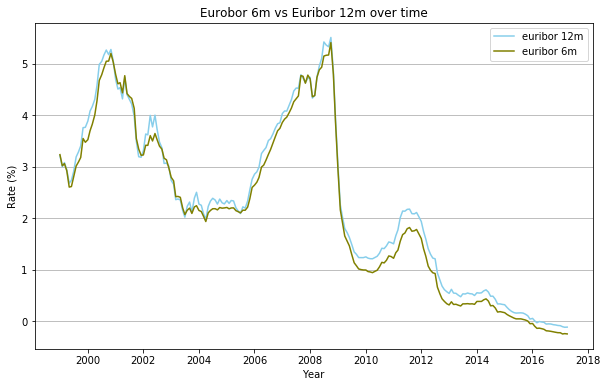

In [6]:
plt.figure(figsize = [10,6])
plt.plot('date', 'rate', data = euribor[euribor.maturity_level == '12m'], color='skyblue')
plt.plot('date', 'rate', data = euribor[euribor.maturity_level == '6m'], color='olive')
plt.ylabel('Rate (%)')
plt.xlabel('Year')
plt.legend(['euribor 12m', 'euribor 6m'])
plt.grid(b = bool, axis = 'y')
plt.title('Eurobor 6m vs Euribor 12m over time')

> Insights from the charts:
> Euribor 12m is always higher than euribor 6m (The difference is around 0.1 - 0.5%). When the interest rate trend is upwards, the difference of 12m and 6m is larger --> **Euribor 6 is more preferable**

> In the last 2 decades, the highest value of euribor is around 5%. With floating interest rate, the loan interest can get very high when euribor increases. However, with the highest value of euribor around 5%, I can cope with the worst scenario when interest sky-rocks.



> Now I will have a closer look on euribor from the previous economic cycle - from 2010 - 2018. The interest rate before financial crisis 2009 is higher than normal situation so I think it is more realistic to ignore that time. In addition, I will import economic growth of EU countries to see if there is any correlation between growth rate and interest rate

In [7]:
growth_rate = pd.read_csv('Euro_growth_rate.csv')
##filter euro_area(19 countries)
growth_rate = growth_rate.iloc[[2]]
## Restructure the data with 3 columns: geo/time, date and growth rate
growth_rate = pd.melt(growth_rate, id_vars=['geo\\time'], var_name = "date", value_name = 'growth_rate')
growth_rate['date'] = pd.to_datetime(growth_rate['date'])
growth_rate.head()
## change type
growth_rate['growth_rate'] = growth_rate['growth_rate'].astype(np.float64)

## Euribor trend and EU growth rate trend

> How is the economic situation when interest rate is high?

Text(0.5, 1.0, 'Euribor trend and EU-19 growth rate over time')

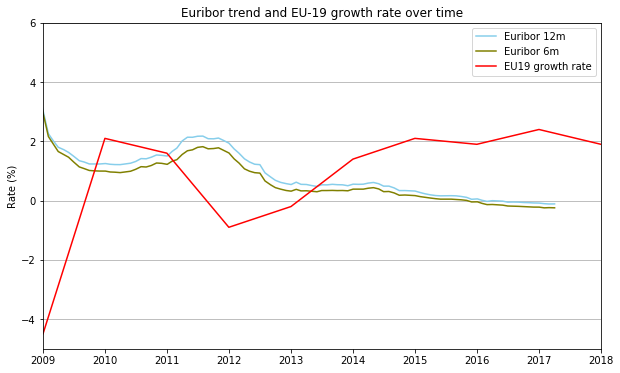

In [10]:
plt.figure(figsize = [10,6])
plt.plot('date', 'rate', data = euribor[euribor.maturity_level == '12m'], color='skyblue')
plt.plot('date', 'rate', data = euribor[euribor.maturity_level == '6m'], color='olive')
plt.plot('date', 'growth_rate', data = growth_rate, color='red')
plt.ylabel('Rate (%)')
plt.legend(['Euribor 12m', 'Euribor 6m', 'EU19 growth rate'])
plt.grid(b = bool, axis = 'y')
plt.xlim(['1-1-2009', '1-1-2018'])
plt.title('Euribor trend and EU-19 growth rate over time')

### There are 3 insights from this charts:
> - When euribo is upward trend, it is not a sudden change. It takes approximately 1.5 years for the euribor 6m goes from 1% - 1.7% --> I still have a lot of buffer time to prepare for interest increase 



> - When the economic is in downturn, the interest rate doesn't go up --> It is good since when the economy is in recession, it is more difficult to find a job/ maintain a job. If the interest rate goes up during this time, it will be very difficult for me


> - When comparing the interest rate trend vs growth rate, the charts show that the interest rate upwards trend in 2011 - 2012 goes together with growth rate with a lag of 1 year. However, after 2013 the interest rate doesn't go together with growth rate anymore -->  It is a macro matter and it doesn't go hand in hand with growth rate --> Need to be careful to interpret the correlation between euribor and growth


### Summary on question 1
> - Euribor 6m is preferable.
> - It is quite safe option for me to get the loan based on the historical data of interest rate. I will have a lot of time buffer in case the interest rate increases. 

## Where is a good location for my apartment (investment wise)?

> My budget is 160,000 euro and I would like to buy 60-squared meter apartment --> The average price per squared meter is 2,700 euro

> First, I need to filter the postal area in my reach, i.e., average price per squared meter is 2,800 euro or less

> Then, I need to visualise to compare the price trend of these areas to decide which area is good for my investment

In [16]:
## import housing price per postals 
##The data was download from "https://hri.fi/data/en_GB/dataset/helsinki-asuminen"
price = pd.read_csv('housing_price_for_old_dwelling.csv')

#My budget is 160,000 euro and I would like to buy 60-squared meter apartment --> The average price per squared meter is 2,700 euro
# First, I need to filter the postal area in my reach, i.e., average price per squared meter is 2,800 euro or less
price_filter = price[price['2017'] <= 2800]

#### copy "2010" data to make it a base line
price_filter['base_line'] = price_filter['2010']

## melt the data
price_filter_copy = pd.melt(price_filter, id_vars=['postal', 'name', 'base_line'], var_name='year', value_name='price')
price_filter_copy

#create increase rate (2010 is the base line)
price_filter_copy['increase%'] = price_filter_copy['price']*100/price_filter_copy['base_line']


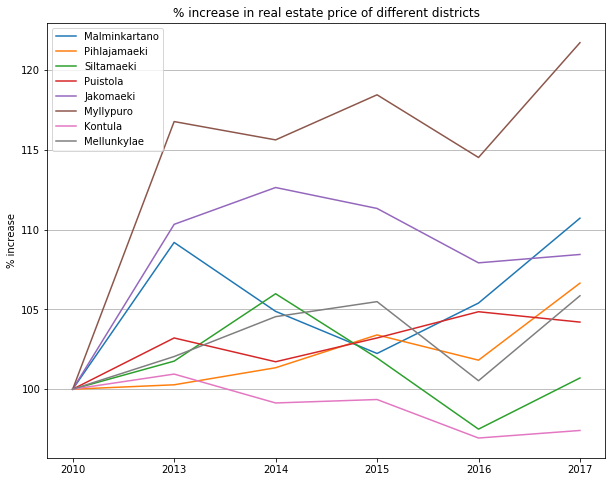

In [17]:
##Visualize the price trend by difference area
district_name = price_filter_copy.name.unique()
plt.figure(figsize = [10,8])
for district in district_name:
    plt.plot('year', 'increase%', data = price_filter_copy[price_filter_copy.name == district])
plt.legend(district_name)
plt.ylabel('% increase')
plt.title('% increase in real estate price of different districts')
plt.grid(b = bool, axis = 'y')

> The price in Myllypuro was unpwards trend in 2010 - 2013 and remains somewhat stable in 2013 -2016. It increases again in 2016 - 2017 probably due to the new opening of one big university in the area.

> Compared to other area, Myllypuro is a good place for my situations for investment